# Data Feature Extraction & Exploration 

In [1]:
import pandas as pd
import numpy as np
import sys
import os
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
import datetime

from textblob import TextBlob
import re
import string
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import wordnet
from pylatexenc.latexwalker import LatexWalker, LatexMathNode
import spacy
from spacy import displacy
import visualise_spacy_tree
from sklearn.feature_extraction.text import  CountVectorizer, TfidfVectorizer
import gensim
from autocorrect import Speller
from django.core.validators import URLValidator
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import multiprocessing as mp

C:\Users\Ace\Anaconda2\envs\cs5242v2\lib\site-packages\torch\cuda\__init__.py:52: UserWarning: CUDA initialization: CUDA driver initialization failed, you might not have a CUDA gpu. (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:115.)
  return torch._C._cuda_getDeviceCount() > 0


In [2]:
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ace\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Ace\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

## Data Feature Extraction

Feature extraction (NLP) (Text level features): 
- Sentiment score 
- LDA: topics (Dummy variable)
- Number of words
- Number of verbs
- Number of nouns
- Number of punctuations
- Number of numbers
- Number of misspelled words 

Word vector: 
- Tf-Id 

In [3]:
# Sentiment Score
def sentiment_scoring(text):
    sent = SentimentIntensityAnalyzer()
    score = sent.polarity_scores(text)['compound']
    return score

# count total words
def count_total_words(text):
    return (len(text.split()))

# average word length
def avg_word_length(text):
    words = text.split()
    return(sum(len(word) for word in words) / len(words))

# number of punctuations
def count_punctuations(text):
    count = 0
    words = nltk.word_tokenize(text)
    for word in words:
        if(word in string.punctuation):
            count += 1
    return count

# number of numerics
def count_numerics(text):
    return len([x for x in text.split() if x.isdigit()])

# Feature noun
def count_noun(text):
    nlp = spacy.load('en_core_web_sm')
    doc = nlp(text)
    noun_count = 0
    for token in doc:        
        if (token.pos_ == 'NOUN'):
            noun_count += 1
    return noun_count

# Feature verb
def count_verb(text):
    nlp = spacy.load('en_core_web_sm')
    doc = nlp(text)
    verb_count = 0
    for token in doc:        
        if (token.pos_=='VERB'):
            verb_count += 1
    return verb_count

# count misspelled words
def count_misspell(text):
    spell = Speller(lang='en')
    words = text.split()
    misspell_count = 0
    misspell_words = []
    validate = URLValidator()
    for words_i in words:
        try:
            validate(words_i)
        except:
            if spell(words_i) == words_i:
                continue
            else:
                if "@" in words_i:
                    continue
                else:
                    misspell_count += 1
                    misspell_words += [words_i]
    return misspell_count

## Raw feature creation
def raw_features(text):
    raw_function_names = ["WordCount","AvgWordLength","NumbersCount",
                         "PunctuationCount","NounCount","VerbCount",
                          "MisspellCount", "SentimentScore"]
    raw_functions = [count_total_words, avg_word_length, count_numerics,
                    count_punctuations, count_noun, count_verb,
                     count_misspell, sentiment_scoring]    
    raw_dict = {raw_function_names[i]:raw_functions[i](text) for i in range(len(raw_function_names))}
    return raw_dict
    
# TFID vectorizer
def feature_tfidvectorizer(text, max_features=500, series=True):
    tfidf = TfidfVectorizer(max_features=max_features, lowercase=True, analyzer='word', 
                            stop_words= 'english',ngram_range=(1,1))
    if series:
        dat_tfIdf = tfidf.fit_transform(text)
    else:
        dat_tfIdf = tfidf.fit_transform(pd.Series([text]))
    return dat_tfIdf

def features_all(df, category_var, tweet_var, followers_var, averagetweets_var):
    import nltk
    from nltk.sentiment.vader import SentimentIntensityAnalyzer
    import string
    import spacy
    from autocorrect import Speller
    from django.core.validators import URLValidator
    
    # Sentiment Score
    def sentiment_scoring(text):
        sent = SentimentIntensityAnalyzer()
        score = sent.polarity_scores(text)['compound']
        return score

    # count total words
    def count_total_words(text):
        return (len(text.split()))

    # average word length
    def avg_word_length(text):
        words = text.split()
        return(sum(len(word) for word in words) / len(words))

    # number of punctuations
    def count_punctuations(text):
        count = 0
        words = nltk.word_tokenize(text)
        for word in words:
            if(word in string.punctuation):
                count += 1
        return count

    # number of numerics
    def count_numerics(text):
        return len([x for x in text.split() if x.isdigit()])

    # Feature noun
    def count_noun(text):
        nlp = spacy.load('en_core_web_sm')
        doc = nlp(text)
        noun_count = 0
        for token in doc:        
            if (token.pos_ == 'NOUN'):
                noun_count += 1
        return noun_count

    # Feature verb
    def count_verb(text):
        nlp = spacy.load('en_core_web_sm')
        doc = nlp(text)
        verb_count = 0
        for token in doc:        
            if (token.pos_=='VERB'):
                verb_count += 1
        return verb_count

    # count misspelled words
    def count_misspell(text):
        spell = Speller(lang='en')
        words = text.split()
        misspell_count = 0
        misspell_words = []
        validate = URLValidator()
        for words_i in words:
            try:
                validate(words_i)
            except:
                if spell(words_i) == words_i:
                    continue
                else:
                    if "@" in words_i:
                        continue
                    else:
                        misspell_count += 1
                        misspell_words += [words_i]
        return misspell_count
    def raw_features(text):
        raw_function_names = ["WordCount","AvgWordLength","NumbersCount",
                             "PunctuationCount","NounCount","VerbCount",
                              "MisspellCount", "SentimentScore"]
        raw_functions = [count_total_words, avg_word_length, count_numerics,
                        count_punctuations, count_noun, count_verb,
                         count_misspell, sentiment_scoring]    
        raw_dict = {raw_function_names[i]:raw_functions[i](text) for i in range(len(raw_function_names))}
        return raw_dict
    
    df['Raw_Features'] = df[tweet_var].apply(lambda x: raw_features(x))
    x_rawfeatures = list(df['Raw_Features'][0].keys())
    for raw_i in x_rawfeatures:
        df[raw_i] = df['Raw_Features'].apply(lambda x: x[raw_i])
    
    ## Category
    category_list = ['News & Politics','family','entertainment', 'technology', 'Finance & Education', 'Health', 'Sports & Fitness', 'fashion', 'gaming', 'food', 'Lifestyle']
    x_dummy = []
    for dummy_i in category_list:
        df["{}_{}".format(category_var, dummy_i)] = df[category_var].map({col_i: (1 if dummy_i in col_i else 0) for col_i in [w for w in df[category_var].unique().tolist() if pd.isnull(w)==False]})
        x_dummy += ["{}_{}".format(category_var, dummy_i)]
        
    ## Topics
    topics_words = ['LIVE', '#OneFamily','#SavIND', 'SOLD', 'invasion', '#TATIPLAuction', 'UNSOLD', '#NCT'] ## Final set of topics
    for topics_i in topics_words:
        df["topics_{}".format(topics_i)] = df[tweet_var].apply(lambda x: 1 if topics_i in x else 0)
        x_dummy += ["topics_{}".format(topics_i)]
    
    return df[[followers_var, averagetweets_var]+x_rawfeatures+x_dummy].copy()

In [ ]:
import pandas as pd
test_df = pd.DataFrame({
    'tweets':['something interestined','something very interesting'],
    'category':['family, entertainment', 'technology, Finance & Education'],
    'followers':[123458465,31513846384],
    'averagetweets':[0.5432,0.456]})
test_df_processed = features_all(test_df, 'category', 'tweets', 'followers', 'averagetweets')
test_df_processed

In [ ]:
# file name
tweets_filename = "compiled tweets.csv"
tweetscount_filename = "tweets per day.csv"

# variables
tweet_content = 'content'

# x variables
x_list_account = ['followers','AverageTweets']
x_list = ["WordCount","AvgWordLength","NumbersCount", "PunctuationCount","NounCount","VerbCount", "MisspellCount", "SentimentScore"]
dummy_cols = ['category']

In [ ]:
tweetscount_df = pd.read_csv(tweetscount_filename)
tweets_df = pd.read_csv(tweets_filename)

tweets_df['AverageTweets'] = tweets_df['username'].map(dict(zip(tweetscount_df['account'],tweetscount_df['tweets per day'])))

In [ ]:
from multiprocessing import Pool
import tqdm

values = tweets_df[tweet_content].tolist()
pool = Pool(processes=8)
raw_features = list(tqdm.tqdm(pool.imap_unordered(raw_features, values), total=len(values)))
tweets_df['Raw_Features'] = raw_features

In [ ]:
raw_features_list = tweets_df['Raw_Features'][0]
for raw_i in raw_features_list:
    tweets_df[raw_i] = tweets_df['Raw_Features'].apply(lambda x: x[raw_i])
    x_list += [raw_i]

In [ ]:
category_list = ['News & Politics','family','entertainment', 'technology', 'Finance & Education', 
                 'Health', 'Sports & Fitness', 'fashion', 'gaming', 'food', 'Lifestyle']
x_dummy = []
for dummy_var_i in dummy_cols:
    if dummy_var_i == 'category':
        dummy_list = category_list
    else:
        dummy_list = [i for i in tweets_df[dummy_var_i].unique() if pd.isnull(i)==False]
    for dummy_i in dummy_list:
        tweets_df["{}_{}".format(dummy_var_i, dummy_i)] = tweets_df[dummy_var_i].map({col_i: (1 if dummy_i in col_i else 0) for col_i in [w for w in tweets_df[dummy_var_i].unique().tolist() if pd.isnull(w)==False]})
        x_dummy += ["{}_{}".format(dummy_var_i, dummy_i)]

In [ ]:
## Topic modelling 1
# corpus = tweets_df[tweet_content]
# ## pre-process corpus
# lst_corpus = []
# for string in corpus:
#     lst_words = string.split()
#     lst_grams = [" ".join(lst_words[i:i + 2]) for i in range(0, 
#                      len(lst_words), 2)]
#     lst_corpus.append(lst_grams)
# ## map words to an id
# id2word = gensim.corpora.Dictionary(lst_corpus)
# ## create dictionary word:freq
# dic_corpus = [id2word.doc2bow(word) for word in lst_corpus] 
# ## train LDA
# lda_model = gensim.models.ldamodel.LdaModel(corpus=dic_corpus, id2word=id2word, num_topics=3, 
#                                             random_state=123, update_every=1, chunksize=100, 
#                                             passes=10, alpha='auto', per_word_topics=True)
# ## output
# lst_dics = []
# for i in range(0,3):
#     lst_tuples = lda_model.get_topic_terms(i)
#     for tupla in lst_tuples:
#         lst_dics.append({"topic":i, "id":tupla[0], 
#                          "word":id2word[tupla[0]], 
#                          "weight":tupla[1]})
# dtf_topics = pd.DataFrame(lst_dics,columns=['topic','id','word','weight'])
# dtf_topics.to_pickle("Word Topics.pkl")
    
## plot
dtf_topics = pd.read_pickle("Word Topics.pkl")
fig, ax = plt.subplots()
sns.barplot(y="word", x="weight", hue="topic", data=dtf_topics, dodge=False, ax=ax).set_title('Main Topics')
ax.set(ylabel="", xlabel="Word Importance")
plt.show()

In [ ]:
## Topic modelling 2
# corpus = tweets_df[
#     ~((tweets_df['content'].str.contains('OneFamily'))
#     | (tweets_df['content'].str.contains('#IND'))
#     | (tweets_df['content'].str.contains('LIVE'))
#     | (tweets_df['content'].str.contains('#SAvIND')))
# ][tweet_content]
# ## pre-process corpus
# lst_corpus = []
# for string in corpus:
#     lst_words = string.split()
#     lst_grams = [" ".join(lst_words[i:i + 2]) for i in range(0, 
#                      len(lst_words), 2)]
#     lst_corpus.append(lst_grams)
# ## map words to an id
# id2word = gensim.corpora.Dictionary(lst_corpus)
# ## create dictionary word:freq
# dic_corpus = [id2word.doc2bow(word) for word in lst_corpus] 
# ## train LDA
# lda_model = gensim.models.ldamodel.LdaModel(corpus=dic_corpus, id2word=id2word, num_topics=3, 
#                                             random_state=123, update_every=1, chunksize=100, 
#                                             passes=10, alpha='auto', per_word_topics=True)
# ## output
# lst_dics = []
# for i in range(0,3):
#     lst_tuples = lda_model.get_topic_terms(i)
#     for tupla in lst_tuples:
#         lst_dics.append({"topic":i, "id":tupla[0], 
#                          "word":id2word[tupla[0]], 
#                          "weight":tupla[1]})
# dtf_topics = pd.DataFrame(lst_dics,columns=['topic','id','word','weight'])
# dtf_topics.to_pickle("Word Topics_v2.pkl")
    
## plot
dtf_topics = pd.read_pickle("Word Topics_v2.pkl")
fig, ax = plt.subplots()
sns.barplot(y="word", x="weight", hue="topic", data=dtf_topics, dodge=False, ax=ax).set_title('Main Topics')
ax.set(ylabel="", xlabel="Word Importance")
plt.show()

In [ ]:
# Topics
topics_words = ['LIVE', '#OneFamily','#SavIND', 'SOLD', 'invasion', '#TATIPLAuction', 'UNSOLD', '#NCT'] ## Final set of topics
for topics_i in topics_words:
    tweets_df["topics_{}".format(topics_i)] = tweets_df[tweet_content].apply(lambda x: 1 if topics_i in x else 0)
    x_dummy += ["topics_{}".format(topics_i)]

In [ ]:
## y_variables
y_list = ['replies', 'retweets', 'likes']

In [ ]:
all_cols = y_list+x_list_account+x_list+x_dummy
other_cols = [i for i in tweets_df.columns if i not in all_cols]

In [ ]:
tweets_df_final = tweets_df[other_cols+all_cols].copy()

In [ ]:
tweets_df_final = tweets_df_final[[i for i in tweets_df_final.columns if ".1" not in i]].copy()
tweets_df_final.to_csv("Tweets Processed.csv", index=False)

In [ ]:
tweets_df_tfid = feature_tfidvectorizer(tweets_df[tweet_content], max_features=500, series=True)
tweets_df['TFID_vectors'] = list(tweets_df_tfid)
tweets_df.to_pickle(r"tweets_df_tfid.pkl")

## Data Exploration

In [3]:
tweets_df_final = pd.read_csv("Tweets Processed.csv")

C:\Users\Ace\Anaconda2\envs\cs5242v2\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
tweets_df_final.columns

Index(['username', 'category', 'date', 'url', 'tweet_id', 'content', 'quotes',
       'in_reply_to', 'Raw_Features', 'replies', 'retweets', 'likes',
       'followers', 'AverageTweets', 'WordCount', 'AvgWordLength',
       'NumbersCount', 'PunctuationCount', 'NounCount', 'VerbCount',
       'MisspellCount', 'SentimentScore', 'category_News & Politics',
       'category_family', 'category_entertainment', 'category_technology',
       'category_Finance & Education', 'category_Health',
       'category_Sports & Fitness', 'category_fashion', 'category_gaming',
       'category_food', 'category_Lifestyle', 'topics_LIVE',
       'topics_#OneFamily', 'topics_#SavIND', 'topics_SOLD', 'topics_invasion',
       'topics_#TATIPLAuction', 'topics_UNSOLD', 'topics_#NCT'],
      dtype='object')

### Multi-collinearity

In [7]:
corr = tweets_df_final[['followers', 'AverageTweets', 'WordCount', 'AvgWordLength',
       'NumbersCount', 'PunctuationCount', 'NounCount', 'VerbCount',
       'MisspellCount', 'SentimentScore', 'category_News & Politics',
       'category_family', 'category_entertainment', 'category_technology',
       'category_Finance & Education', 'category_Health',
       'category_Sports & Fitness', 'category_fashion', 'category_gaming',
       'category_food', 'category_Lifestyle', 'topics_LIVE',
       'topics_#OneFamily', 'topics_#SavIND', 'topics_SOLD', 'topics_invasion',
       'topics_#TATIPLAuction', 'topics_UNSOLD', 'topics_#NCT']].corr()
corr.style.background_gradient(cmap='coolwarm')

C:\Users\Ace\Anaconda2\envs\cs5242v2\lib\site-packages\pandas\io\formats\style.py:2780: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
C:\Users\Ace\Anaconda2\envs\cs5242v2\lib\site-packages\pandas\io\formats\style.py:2781: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,followers,AverageTweets,WordCount,AvgWordLength,NumbersCount,PunctuationCount,NounCount,VerbCount,MisspellCount,SentimentScore,category_News & Politics,category_family,category_entertainment,category_technology,category_Finance & Education,category_Health,category_Sports & Fitness,category_fashion,category_gaming,category_food,category_Lifestyle,topics_LIVE,topics_#OneFamily,topics_#SavIND,topics_SOLD,topics_invasion,topics_#TATIPLAuction,topics_UNSOLD,topics_#NCT
followers,1.000000,-0.274345,0.052085,-0.083708,0.046050,-0.037077,0.000047,0.069142,-0.069154,0.055769,-0.573269,0.136336,0.659698,0.205151,0.082527,0.151410,0.151411,-0.018342,-0.042259,-0.059714,-0.019302,-0.038337,-0.053361,nan,-0.019973,0.015330,nan,-0.013313,-0.021084
AverageTweets,-0.274345,1.000000,-0.012793,0.073535,0.003112,0.120978,0.049576,-0.068815,-0.035434,-0.111838,0.618901,-0.022949,-0.299441,-0.110621,-0.038288,-0.444849,-0.444846,-0.080032,-0.119585,-0.113169,-0.034917,0.009694,-0.086975,nan,-0.038115,-0.006962,nan,-0.025195,-0.049154
WordCount,0.052085,-0.012793,1.000000,-0.501533,0.190654,0.467814,0.725197,0.625314,0.240120,-0.002495,0.132752,0.019781,0.058783,-0.019131,-0.012571,-0.159964,-0.159961,0.018748,-0.093262,-0.115461,0.010095,0.035439,0.003416,nan,-0.024487,0.038775,nan,-0.018690,-0.003937
AvgWordLength,-0.083708,0.073535,-0.501533,1.000000,-0.152508,-0.027743,-0.303918,-0.304281,-0.090764,-0.041226,0.078160,-0.012279,-0.078823,0.019467,0.016005,-0.044720,-0.044716,-0.004451,0.064572,-0.039127,-0.019409,0.022432,-0.041767,nan,0.003304,-0.014014,nan,0.007036,0.020283
NumbersCount,0.046050,0.003112,0.190654,-0.152508,1.000000,0.164220,0.115925,0.013284,0.199862,0.018447,-0.036752,-0.003907,-0.042367,-0.011215,-0.003376,0.099084,0.099084,0.005211,-0.024778,-0.033343,0.000337,0.006149,-0.010942,nan,0.006409,-0.014231,nan,-0.000646,0.003783
PunctuationCount,-0.037077,0.120978,0.467814,-0.027743,0.164220,1.000000,0.398260,0.163573,0.344386,0.045229,0.069686,0.001117,-0.100625,0.007720,-0.009303,0.021660,0.021656,0.009698,-0.030141,-0.075004,-0.002422,0.103541,0.031686,nan,-0.013196,-0.029496,nan,-0.011761,0.094210
NounCount,0.000047,0.049576,0.725197,-0.303918,0.115925,0.398260,1.000000,0.441980,0.139034,-0.041391,0.145218,0.011927,0.025056,-0.020560,-0.016298,-0.153785,-0.153785,0.010151,-0.078697,-0.110880,-0.004309,0.042150,0.017049,nan,-0.010721,0.029888,nan,-0.008196,0.069891
VerbCount,0.069142,-0.068815,0.625314,-0.304281,0.013284,0.163573,0.441980,1.000000,0.046050,-0.015237,0.027947,0.025694,0.146673,0.011662,0.000606,-0.132797,-0.132796,0.012789,-0.059930,-0.050690,0.007921,-0.003470,0.016584,nan,-0.021783,0.054525,nan,-0.016681,-0.030536
MisspellCount,-0.069154,-0.035434,0.240120,-0.090764,0.199862,0.344386,0.139034,0.046050,1.000000,0.017375,-0.038343,-0.008354,-0.065703,-0.028324,-0.007783,0.122572,0.122565,0.059348,-0.028711,-0.048851,0.028955,0.096938,0.020114,nan,0.016580,-0.020760,nan,0.004690,0.117064
SentimentScore,0.055769,-0.111838,-0.002495,-0.041226,0.018447,0.045229,-0.041391,-0.015237,0.017375,1.000000,-0.171976,0.018239,0.028274,0.033084,0.021067,0.151299,0.151179,0.037679,0.020581,0.111452,0.013274,-0.007220,0.030136,nan,-0.000493,-0.033885,nan,-0.000546,0.001968


<AxesSubplot:>

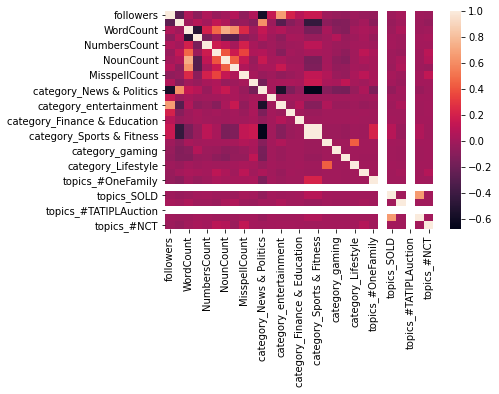

In [9]:
sns.heatmap(corr)

### Average Tweets vs Category (News & Politics, Health, and Sports & Fitness) 

<AxesSubplot:xlabel='category_Sports & Fitness', ylabel='AverageTweets'>

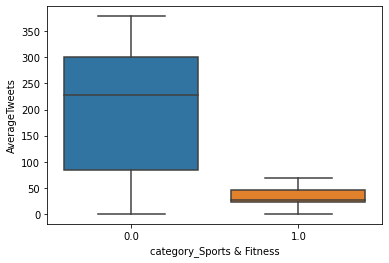

In [20]:
hue_var = 'category_Sports & Fitness'
sns.boxplot(x=hue_var, y=x_var, data=tweets_df_final)

<AxesSubplot:xlabel='AverageTweets', ylabel='likes'>

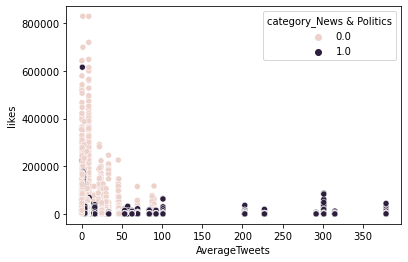

In [27]:
y_var = 'likes'
x_var = 'AverageTweets'
hue_var = 'category_News & Politics'
sns.scatterplot(data=tweets_df_final[tweets_df_final[y_var]!=tweets_df_final[y_var].max()], x=x_var, y=y_var, hue=hue_var)

### Category & Topics Exploration

#### Number of tweets per category/topics

<AxesSubplot:xlabel='tweets', ylabel='Category'>

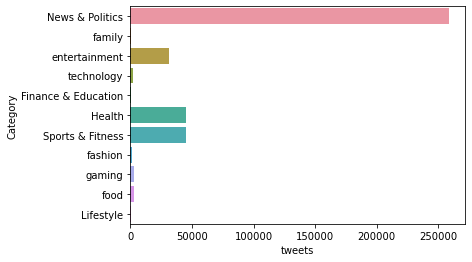

In [51]:
category_vars_ls = [i.replace("category_","") for i in tweets_df_final.columns if "category_" in i]
category_sum_ls = [tweets_df_final[i].sum() for i in tweets_df_final.columns if "category_" in i]
sns.barplot(y="Category", x="tweets", data=pd.DataFrame({'Category':category_vars_ls,'tweets':category_sum_ls}))

<AxesSubplot:xlabel='tweets', ylabel='topics'>

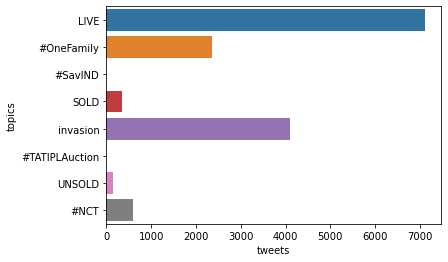

In [52]:
topics_vars_ls = [i.replace("topics_","") for i in tweets_df_final.columns if "topics_" in i]
topics_sum_ls = [tweets_df_final[i].sum() for i in tweets_df_final.columns if "topics_" in i]
sns.barplot(y="topics", x="tweets", data=pd.DataFrame({'topics':topics_vars_ls,'tweets':topics_sum_ls}))

#### Average number of replies per group

<AxesSubplot:xlabel='average likes', ylabel='category'>

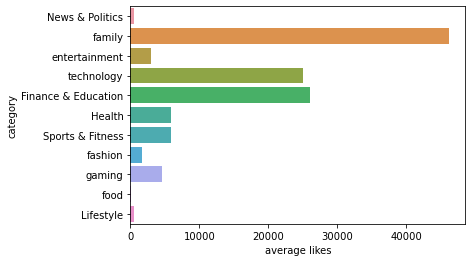

In [58]:
category_vars_ls = [i.replace("category_","") for i in tweets_df_final.columns if "category_" in i]
category_average_ls = [tweets_df_final[tweets_df_final[i]==1]['likes'].mean() for i in tweets_df_final.columns if "category_" in i]
sns.barplot(y="category", x="average likes", data=pd.DataFrame({'category':category_vars_ls,'average likes':category_average_ls}))

<AxesSubplot:xlabel='average retweets', ylabel='topics'>

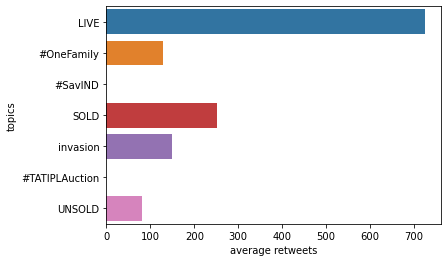

In [67]:
topics_vars_ls = [i.replace("topics_","") for i in tweets_df_final.columns if ("topics_" in i) and ("#NCT" not in i)]
topics_average_ls = [tweets_df_final[tweets_df_final[i]==1]['likes'].mean() for i in tweets_df_final.columns if ("topics_" in i) and ("#NCT" not in i)]
sns.barplot(y="topics", x="average likes", data=pd.DataFrame({'topics':topics_vars_ls,'average likes':topics_average_ls}))

#### spread of likes per tweet of each category

<AxesSubplot:xlabel='likes', ylabel='category'>

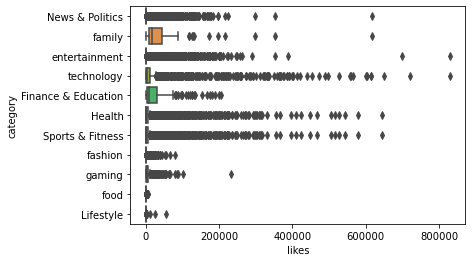

In [68]:
category_spread_df = pd.DataFrame()
for category_i in [i for i in tweets_df_final.columns if "category_" in i]:
    tweets_df_final_temp = tweets_df_final[
        tweets_df_final[category_i]==1
    ].copy().reset_index(drop=True)[['likes']]
    tweets_df_final_temp['category'] = category_i.replace("category_","")
    category_spread_df = category_spread_df.append(tweets_df_final_temp).reset_index(drop=True)
sns.boxplot(y='category', x='likes', data=category_spread_df[category_spread_df['likes']!=category_spread_df['likes'].max()])

<AxesSubplot:xlabel='likes', ylabel='topics'>

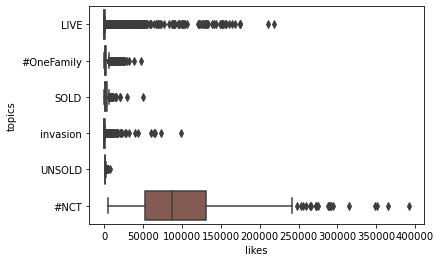

In [13]:
topics_spread_df = pd.DataFrame()
for topics_i in [i for i in tweets_df_final.columns if "topics_" in i]:
    tweets_df_final_temp = tweets_df_final[
        tweets_df_final[topics_i]==1
    ].copy().reset_index(drop=True)[['likes']]
    tweets_df_final_temp['topics'] = topics_i.replace("topics_","")
    topics_spread_df = topics_spread_df.append(tweets_df_final_temp).reset_index(drop=True)
sns.boxplot(y='topics', x='likes', data=topics_spread_df[topics_spread_df['likes']!=topics_spread_df['likes'].max()])

## Process Elon GPT Tweets

In [4]:
elon_gpt = pd.read_csv("elon_gpt.csv")
elon_gpt['category'] = tweets_df_final[tweets_df_final['username']=='elonmusk'].copy().reset_index(drop=True)['category'][0]
elon_gpt['followers'] = tweets_df_final[tweets_df_final['username']=='elonmusk'].copy().reset_index(drop=True)['followers'][0]
elon_gpt['AverageTweets'] = tweets_df_final[tweets_df_final['username']=='elonmusk'].copy().reset_index(drop=True)['AverageTweets'][0]
elon_gpt = elon_gpt.head(1000)

NameError: name 'tweets_df_final' is not defined

In [ ]:
elon_gpt_processed = features_all(elon_gpt, 'category', 'tweets', 'followers', 'AverageTweets')
elon_gpt_processed['tweets'] = elon_gpt['tweets']
elon_gpt_processed.to_csv("elon_gpt_processed_1000.csv", index=False)